# Sudoku solver using simulated annealing

Algorithm bases on switching to random numbers which are not known at the start, in random 3x3 square. The goal is obviously to solve the game of sudoku. Sudokus are parsed from a text file and require '0' or 'x' at the empty squares. Some examples may require restarting the algorithm as simmulated annealing may be looked at endless number of times due to randomness.

Results are printed after finding solution. The algorithm solves 'Worlds hardes sudoku' according to https://www.telegraph.co.uk/news/science/science-news/9359579/Worlds-hardest-sudoku-can-you-crack-it.html.



In [100]:
import random
import numpy as np
from copy import deepcopy
import math
import matplotlib.pyplot as plt

size = 9




def print_sudoku(sudoku):
    n = len(sudoku)


    def printRowBorder():
        for x in range(n+4):
            if (x) % 4 == 0: print('+', end = " ")
            else: print('-', end = " ")

    for i in range(n):
        if i % 3 == 0:
            printRowBorder()
            print("")

        for j in range(n):
            if j % 3 == 0: print('|', end = " " )
            print(sudoku[i][j], end = " ")
        print('|')
        
    printRowBorder()
    print()




        
def generate_random_point(sudoku,row,col):
        while True:
            x, y = random.randint(row,row+2), random.randint(col, col+2)
            if sudoku[x][y]==0:
                return x, y

def read_file(path):
    lines = []
    with open(str(path), "r") as f:
        lines = f.readlines()
    sudoku = [[0]*size for _ in range(size)]


    cnt = 0
    for row, line in enumerate(lines):
        for col, char in enumerate(line):

            if char != 'x' and char != '\n' and char != '0':
                cnt += 1
                sudoku[row][col] = int(char)

    print("taken places = ", cnt)

    original = deepcopy(sudoku)
    for i in range(0,size, +3):
        for j in range(0,size, +3):
            generate_small_square(sudoku, i, j)
    return sudoku, original, cnt


def calc_cost(sudoku):

    cost = 0
    for i in range(size):
        cntrows = [0]*size
        cntcols = [0]*size
        for j in range(size):
            cntrows[sudoku[i][j]-1] += 1
            cntcols[sudoku[j][i]-1] += 1
        cost += sum(x>1 for x in cntrows) + sum(y>1 for y in cntcols)
    return cost

def swap(sudoku, p1, p2):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]

    sudoku[x1][y1], sudoku[x2][y2] = sudoku[x2][y2], sudoku[x1][y1]


def generate_next_state(original, sudoku,squareNums):

    square_to_change = random.randint(0,8)
    x, y = squareNums.get(square_to_change)

    p1x, p1y = generate_random_point(original, x, y)
    p2x, p2y = generate_random_point(original, x, y)
    while (p2x, p2y) == (p1x, p1y):
        p2x, p2y = generate_random_point(original, x, y)
    
    swap(sudoku, (p1x,p1y), (p2x,p2y))

    return (p1x,p1y), (p2x,p2y)

    


def generate_small_square(sudoku, row, col):

    existing_elements = []

    

    for i in range(row,row+3,1):
        for j in range(col, col+3, 1):
            if sudoku[i][j] != 0:
                existing_elements.append(sudoku[i][j])
    
    while len(existing_elements)<9:
        randNum = random.randint(1,9)
        if not randNum in existing_elements:
            x, y = generate_random_point(sudoku,row,col)

            sudoku[x][y] = randNum
            existing_elements.append(randNum)


def calcDeviation(original, sudoku, squareNums):
    
    tmp = []
    for i in range(200):
        tmp.append(calc_cost(sudoku))
        generate_next_state(original, sudoku, squareNums)

    return np.std(tmp)


def probability(new,old,T):
    if(T==0):
        return 0.0
    try:
        return math.exp(-(new-old)/T)
    except OverflowError:
        return 0.0
    except RuntimeWarning:
        return 0.0

def simulated_annealing(path, max_iterations = 1e6,temperature=lambda i: 0.99999**i, printing=True):
    sudoku, original, taken_places = read_file(path)
    if printing:
        print('\nsudoku to solve:')
        print_sudoku(original)

    #key = number of square, value = column index, row index
    squareNumbers = {0: (0,0), 1: (0,3), 2: (0,6),
                    3: (3,0), 4: (3,3), 5: (3,6),
                    6: (6,0), 7: (6,3),8: (6,6)} 

    # T = calcDeviation(original, sudoku, squareNumbers)

    sudoku_cost = calc_cost(sudoku)

    for i in range(int(max_iterations)):

        T = temperature(i)
        p1,p2 = generate_next_state(original,sudoku,squareNumbers)
        new_cost = calc_cost(sudoku)

        if new_cost == 0:
            print('\nsolved sudoku:')
            print_sudoku(sudoku)
            return i, taken_places

        elif new_cost<sudoku_cost or random.random() < probability(new_cost,sudoku_cost,T):
            sudoku_cost = new_cost
        else:
            swap(sudoku, p1, p2)

    return max_iterations, taken_places







Solving sudokus/1.txt
taken places =  32

sudoku to solve:
+ - - - + - - - + - - - + 
| 0 0 3 | 0 2 0 | 6 0 0 |
| 9 0 0 | 3 0 5 | 0 0 1 |
| 0 0 1 | 8 0 6 | 4 0 0 |
+ - - - + - - - + - - - + 
| 0 0 8 | 1 0 2 | 9 0 0 |
| 7 0 0 | 0 0 0 | 0 0 8 |
| 0 0 6 | 7 0 8 | 2 0 0 |
+ - - - + - - - + - - - + 
| 0 0 2 | 6 0 9 | 5 0 0 |
| 8 0 0 | 2 0 3 | 0 0 9 |
| 0 0 5 | 0 1 0 | 3 0 0 |
+ - - - + - - - + - - - + 
solved sudoku:
+ - - - + - - - + - - - + 
| 4 8 3 | 9 2 1 | 6 5 7 |
| 9 6 7 | 3 4 5 | 8 2 1 |
| 2 5 1 | 8 7 6 | 4 9 3 |
+ - - - + - - - + - - - + 
| 5 4 8 | 1 3 2 | 9 7 6 |
| 7 2 9 | 5 6 4 | 1 3 8 |
| 1 3 6 | 7 9 8 | 2 4 5 |
+ - - - + - - - + - - - + 
| 3 7 2 | 6 8 9 | 5 1 4 |
| 8 1 4 | 2 5 3 | 7 6 9 |
| 6 9 5 | 4 1 7 | 3 8 2 |
+ - - - + - - - + - - - + 





Solving sudokus/2.txt
taken places =  30

sudoku to solve:
+ - - - + - - - + - - - + 
| 2 0 0 | 0 8 0 | 3 0 0 |
| 0 6 0 | 0 7 0 | 0 8 4 |
| 0 3 0 | 5 0 0 | 2 0 9 |
+ - - - + - - - + - - - + 
| 0 0 0 | 1 0 5 | 4 0 8 |
| 0 0 0 | 0 0 0

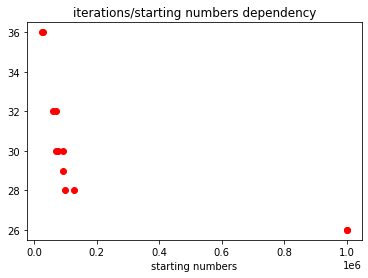

In [92]:
#examples with different level of difficulty

if __name__ == "__main__":
    iterations = []
    taken_places = []
    for i in range(1,13):
        name= 'sudokus/' + str(i) + '.txt'

        print('\n\n\n\n\nSolving', name)

        x,y = simulated_annealing(name)
        iterations.append(x)
        taken_places.append(y)
        print()

    plt.plot(iterations, taken_places, 'ro')
    plt.title("iterations/starting numbers dependency")
    plt.xlabel("iterations")
    plt.xlabel("starting numbers")
    plt.savefig("output")



Some sudokus were not solved in max number of iterations due to reason mentioned above. Now, let's try solving same sudoku 10 times.

taken places =  26

sudoku to solve:
+ - - - + - - - + - - - + 
| 0 0 0 | 9 0 0 | 0 0 2 |
| 0 5 0 | 1 2 3 | 4 0 0 |
| 0 3 0 | 0 0 0 | 1 6 0 |
+ - - - + - - - + - - - + 
| 9 0 8 | 0 0 0 | 0 0 0 |
| 0 7 0 | 0 0 0 | 0 9 0 |
| 0 0 0 | 0 0 0 | 2 0 5 |
+ - - - + - - - + - - - + 
| 0 9 1 | 0 0 0 | 0 5 0 |
| 0 0 7 | 4 3 9 | 0 2 0 |
| 4 0 0 | 0 0 7 | 0 0 0 |
+ - - - + - - - + - - - + 
solved sudoku:
+ - - - + - - - + - - - + 
| 8 1 4 | 9 7 6 | 5 3 2 |
| 6 5 9 | 1 2 3 | 4 7 8 |
| 7 3 2 | 8 5 4 | 1 6 9 |
+ - - - + - - - + - - - + 
| 9 4 8 | 2 6 5 | 3 1 7 |
| 2 7 5 | 3 4 1 | 8 9 6 |
| 1 6 3 | 7 9 8 | 2 4 5 |
+ - - - + - - - + - - - + 
| 3 9 1 | 6 8 2 | 7 5 4 |
| 5 8 7 | 4 3 9 | 6 2 1 |
| 4 2 6 | 5 1 7 | 9 8 3 |
+ - - - + - - - + - - - + 
taken places =  26

sudoku to solve:
+ - - - + - - - + - - - + 
| 0 0 0 | 9 0 0 | 0 0 2 |
| 0 5 0 | 1 2 3 | 4 0 0 |
| 0 3 0 | 0 0 0 | 1 6 0 |
+ - - - + - - - + - - - + 
| 9 0 8 | 0 0 0 | 0 0 0 |
| 0 7 0 | 0 0 0 | 0 9 0 |
| 0 0 0 | 0 0 0 | 2 0 5 |
+ - - - + - - - +

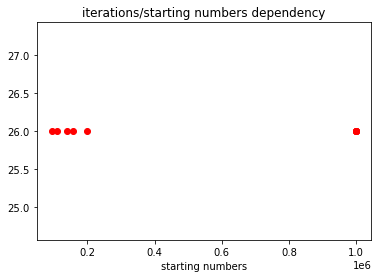

In [93]:
iterations = []
taken_places = []

for i in range(10):
    string = 'sudokus/10.txt'
    x,y = simulated_annealing(string,max_iterations=int(1e6))
    iterations.append(x)
    taken_places.append(y)
    print()

plt.plot(iterations, taken_places, 'ro')
plt.title("iterations/starting numbers dependency")
plt.xlabel("iterations")
plt.xlabel("starting numbers")
plt.savefig("output")


As predicted, algorithm found soludion for most cases. The conlusion is hypothesis about dependency on randomness was correct.

# Worlds hardes sudoku

In [103]:
#800 000 to avoid looping over and over same, wrong result
b = 8e5
string = 'sudokus/hardest.txt'
_, sudoku, _ = read_file(string)
print_sudoku(sudoku)
for i in range(int(1e4)):

    x,y = simulated_annealing(string,max_iterations=int(b), printing=False)
    if x < b-1:
        print('number of iterations: ', x)
        break

    print(i+1, "th try")


taken places =  21
+ - - - + - - - + - - - + 
| 8 0 0 | 0 0 0 | 0 0 0 |
| 0 0 3 | 6 0 0 | 0 0 0 |
| 0 7 0 | 0 9 0 | 2 0 0 |
+ - - - + - - - + - - - + 
| 0 5 0 | 0 0 7 | 0 0 0 |
| 0 0 0 | 0 4 5 | 7 0 0 |
| 0 0 0 | 1 0 0 | 0 3 0 |
+ - - - + - - - + - - - + 
| 0 0 1 | 0 0 0 | 0 6 8 |
| 0 0 8 | 5 0 0 | 0 1 0 |
| 0 9 0 | 0 0 0 | 4 0 0 |
+ - - - + - - - + - - - + 
taken places =  21
1 th try
taken places =  21
2 th try
taken places =  21
3 th try
taken places =  21
4 th try
taken places =  21
5 th try
taken places =  21
6 th try
taken places =  21
7 th try
taken places =  21
8 th try
taken places =  21
9 th try
taken places =  21
10 th try
taken places =  21
11 th try
taken places =  21
12 th try
taken places =  21
13 th try
taken places =  21
14 th try
taken places =  21
15 th try
taken places =  21
16 th try
taken places =  21
17 th try
taken places =  21

solved sudoku:
+ - - - + - - - + - - - + 
| 8 1 2 | 7 5 3 | 6 4 9 |
| 9 4 3 | 6 8 2 | 1 7 5 |
| 6 7 5 | 4 9 1 | 2 8 3 |
+ - - - + - - -

Solved after 5 tries, with over 126k iterations.